# Data Processing

In [2]:
class Data:
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)
        
class Dataset:
    def __init__(self, datalist):
        self.data = datalist
    
    def GetX(self):
        data_x = []
        for datum in self.data:
            data_x.append(datum.x)
        return data_x
    
    def GetY(self):
        data_y = []
        for datum in self.data:
            data_y.append(datum.y)
        return data_y

In [3]:
import numpy as np
data_file = open('data.xls', "r")
temp_data = []
for line in data_file:
    temp = (Data(line[:-1].split()[0], line[:-1].split()[1]))
    temp_data.append(temp)
data_sample = Dataset(temp_data)
data_sample

## Matplotlib Tutorial
https://matplotlib.org/stable/tutorials/index

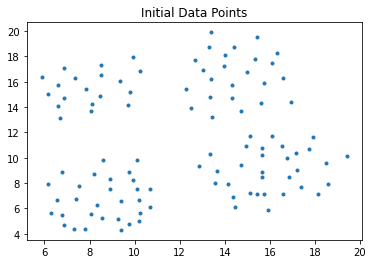

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data_sample.GetX(), data_sample.GetY(), marker='.')
plt.title("Initial Data Points")
plt.show()

# K-Means
- 聚类属于非监督学习，K均值聚类是最基础常用的聚类算法。它的基本思想是，通过迭代寻找K个簇（Cluster）的一种划分方案，使得聚类结果对应的损失函数最小。其中，损失函数可以定义为各个样本距离所属簇中心点的误差平方和 `J`.
- 与分类、序列标注等任务不同，聚类是在事先并不知道任何样本标签的情况下，通过数据之间的内在关系把样本划分为若干类别，使得同类别样本之间的相似度高，不同类别之间的样本相似度低（即增大类内聚，减少类间距）。
- KMeans最核心的部分就是先固定中心点，调整每个样本所属的类别来减少`J`；再固定每个样本的类别，调整中心点继续减小`J`。两个过程交替循环，`J`单调递减直到最（极）小值，中心点和样本划分的类别同时收敛。

In [5]:
from sklearn.cluster import KMeans

## Scikit Kmeans document
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

14.425 16.495833333333334
8.626666666666667 6.681666666666666
15.9625 8.985937499999999
7.973684210526315 15.505263157894737


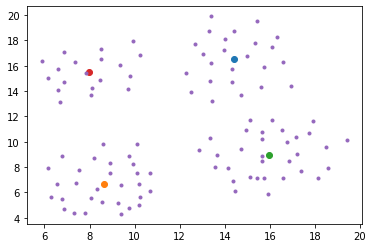

In [11]:
fit_data = np.vstack(list(zip(data_sample.GetX(), data_sample.GetY())))

kmeans = KMeans(n_clusters=4)
kmeans.fit(fit_data)
for point in kmeans.cluster_centers_:
    plt.scatter(point[0], point[1])
    print(point[0], point[1])
plt.scatter(data_sample.GetX(), data_sample.GetY(), marker='.')
plt.show()

# 手写Kmeans

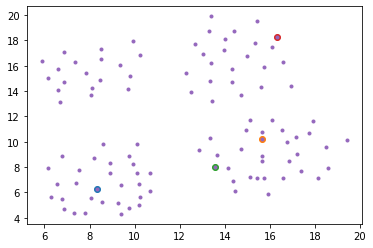

In [7]:
# 规定有多少个簇（cluster）
n_cluster = 4

# 从样本点中选取簇心
random_choice = np.random.choice(105, 4)
cluster_init_center = [fit_data[index] for index in random_choice]
for point in cluster_init_center:
    plt.scatter(point[0], point[1])
plt.scatter(data_sample.GetX(), data_sample.GetY(), marker='.')
plt.show()

In [8]:
class Point():
    def __init__(self, x, y, label):
        self.x_ = x
        self.y_ = y
        self.label_ = label
    
    def SetLabel(self, label):
        self.label_ = label
    
points = []
for data in fit_data:
    points.append(Point(data[0], data[1], 0))

8.206756756756755 8.312162162162164
15.974 10.434000000000001
13.87307692307692 8.180769230769231
12.798333333333336 16.791666666666664


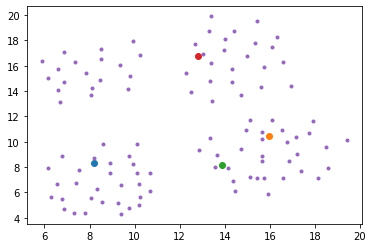

8.489393939393938 7.312121212121212
16.847499999999997 10.287499999999998
14.678571428571427 7.85
11.70263157894737 16.35657894736842


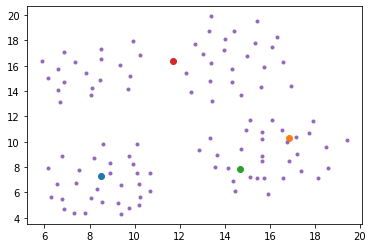

8.626666666666665 6.681666666666667
16.957894736842103 10.394736842105262
14.743333333333332 7.92
11.345121951219515 16.14024390243902


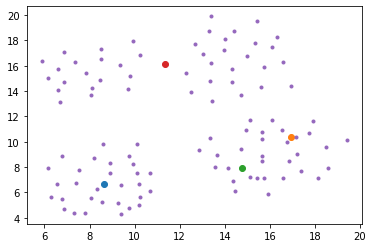

8.626666666666665 6.681666666666667
16.81578947368421 10.713157894736842
14.909374999999999 7.903125
11.261250000000002 16.201249999999995


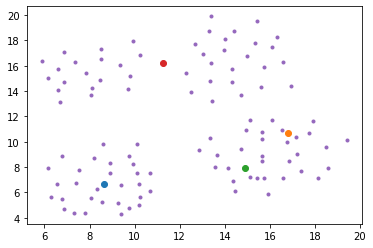

8.626666666666665 6.681666666666667
16.735294117647054 11.058823529411763
15.19722222222222 7.888888888888889
11.261250000000002 16.201249999999995


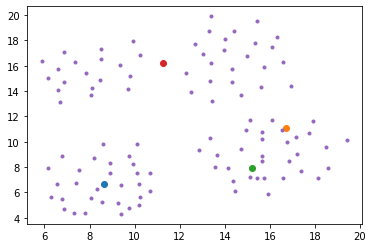

8.626666666666665 6.681666666666667
16.61764705882353 11.552941176470586
15.376315789473683 7.889473684210526
11.124358974358977 16.198717948717942


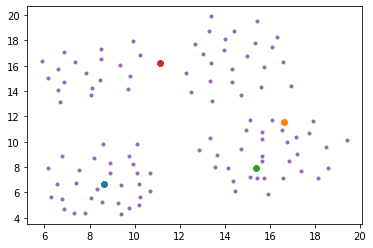

8.626666666666665 6.681666666666667
16.36111111111111 12.027777777777779
15.467499999999998 7.947500000000001
10.936486486486489 16.286486486486485


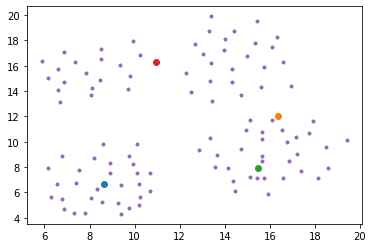

8.626666666666665 6.681666666666667
16.252631578947366 12.168421052631578
15.467499999999998 7.947500000000001
10.843055555555559 16.330555555555552


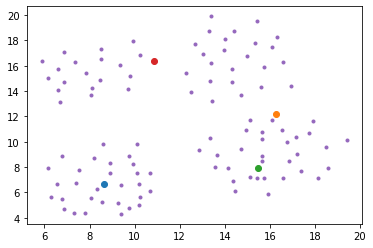

8.626666666666665 6.681666666666667
16.126315789473683 12.586842105263157
15.61190476190476 8.023809523809524
10.692857142857145 16.297142857142852


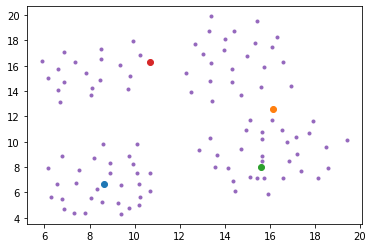

8.626666666666665 6.681666666666667
15.98 13.487499999999997
15.66304347826087 8.20217391304348
10.270312500000001 16.2390625


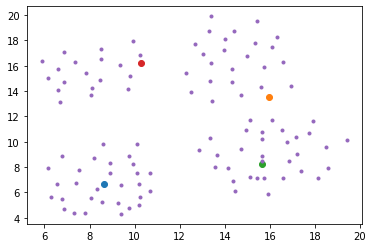

8.626666666666665 6.681666666666667
15.463157894736844 14.731578947368417
15.933333333333334 8.54074074074074
9.810344827586206 16.122413793103444


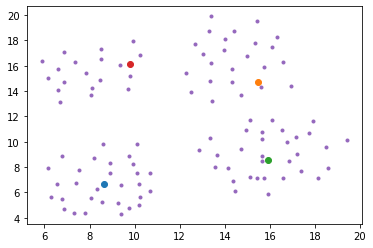

8.626666666666665 6.681666666666667
14.804545454545455 15.799999999999999
15.986666666666666 8.801666666666666
8.834782608695653 15.930434782608693


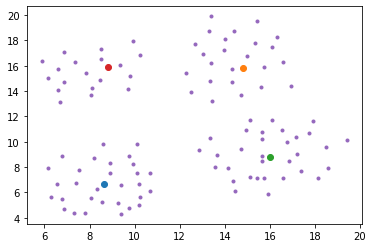

8.626666666666665 6.681666666666667
14.424999999999999 16.495833333333334
15.962499999999999 8.985937499999999
7.973684210526316 15.505263157894735


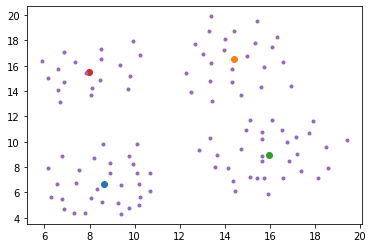

8.626666666666665 6.681666666666667
14.424999999999999 16.495833333333334
15.962499999999999 8.985937499999999
7.973684210526316 15.505263157894735


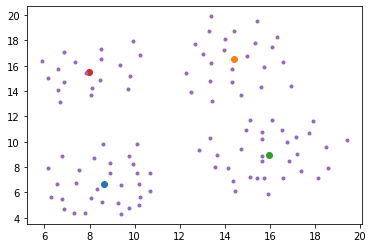

In [9]:
import math
cluster_center = cluster_init_center
stop = False
while(not stop):
    stop = True
    # 计算每一个样本点到初始簇心的欧氏距离
    for every_point in points:
        temp_list = []
        for every_center in cluster_center:
            temp_list.append(math.dist((every_point.x_, every_point.y_), every_center))
        index = temp_list.index(min(temp_list))

        if every_point.label_ != temp_list.index(min(temp_list)):
            stop = False
        every_point.SetLabel(index)


    # 确定每一个簇的平均点
    sum_point = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for every_point in points:
        sum_point[every_point.label_] = [i + j for i, j in zip(sum_point[every_point.label_], [every_point.x_, every_point.y_, 1])]


    for center in sum_point:
        cluster_center[sum_point.index(center)] = [x / center[-1] for x in [center[0], center[1]]]
        pt = cluster_center[sum_point.index(center)]
        print(pt[0], pt[1])
        plt.scatter(pt[0], pt[1])
    plt.scatter(data_sample.GetX(), data_sample.GetY(), marker='.')
    plt.show()

In [10]:
sum_point

[[258.79999999999995, 200.45, 30],
 [346.2, 395.9, 24],
 [510.79999999999995, 287.54999999999995, 32],
 [151.5, 294.59999999999997, 19]]